In [25]:
import pandas as pd
import numpy as np
import random
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

read_x = pd.read_csv('/content/drive/MyDrive/githar/test/boston_house_data(csv).csv')
read_y = pd.read_csv('/content/drive/MyDrive/githar/test/boston_house_target(csv).csv')
x = read_x.iloc[:, 13].values.reshape(-1, 1) #x1.shape = (506,1)
y = read_y.iloc[:, 1].values.reshape(-1, 1) #y.shape = (506,1)

In [26]:
def train_test_split(X, y, test_size = 0.3):
  indices = random.sample(range(X.shape[0]), X.shape[0]) #X를 섞어주기 위해 X의 크기만큼의 수를 random하게 배열한다.
  for i in range(X.shape[0]):
    X[i] = X[indices[i]]
    y[i] = y[indices[i]] #인덱스로 X와 y를 random하게 섞어준다.

  X_train = X[:int(X.shape[0] * (1 - test_size))]
  X_test = X[int(X.shape[0] * (1 - test_size)):]
  y_train = y[:int(y.shape[0] * (1 - test_size))]
  y_test = y[int(y.shape[0] * (1 - test_size)):] #X와 y를 분할한다.
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #X_train,y_train.shape = (320,2), X_test,y_test.shape = (80,2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 1) (152, 1) (354, 1) (152, 1)


0.00023552749511976737 22.66099021372055


<ipython-input-107-db0a476545a8>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xp = np.arange(min(X_train), max(X_train), 0.01).reshape(-1,1)


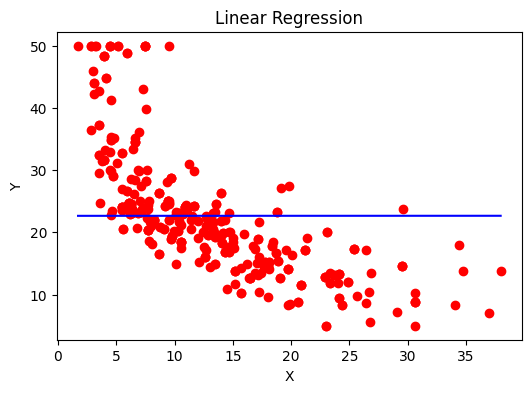

In [107]:
w1 = 0
w0 = 0
alpha = 0.00001
epochs = 10000

for i in range(epochs) :
  y_pred = w1 * X_train + w0
  dw1 = (X_train*(y_pred - y_train)).sum() / len(X_train)
  dw0 = (y_pred - y_train).sum() / len(X_train)
  w1 = w1 - alpha * dw1
  w0 = w0 - alpha * dw0

print(w1, w0)

plt.figure(figsize = (6,4))
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_train,y_train,'ro')

xp = np.arange(min(X_train), max(X_train), 0.01).reshape(-1,1)
yp = w1 * xp + w0
plt.plot(xp, yp, 'b-')
plt.show()

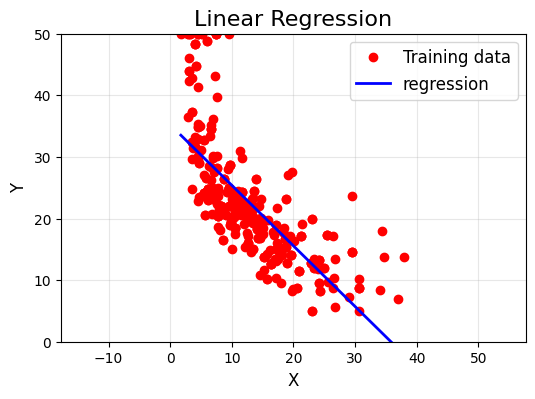

In [54]:
from sklearn import linear_model


reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_
reg.intercept_

plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.xlim(0,40)
plt.ylim(0,50)
plt.plot(X_train, y_train, 'ro', label = "Training data")

plt.plot(xp, reg.predict(xp), 'b', linewidth = 2, label = "regression")
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim(0,40)
plt.ylim(0,50)
plt.show()

<ipython-input-115-a0164bee3ce0>:18: RuntimeWarning: overflow encountered in multiply
  wm_grad[i] = (error * X_train_matrix[:, i]).mean()
<ipython-input-115-a0164bee3ce0>:19: RuntimeWarning: invalid value encountered in subtract
  weights_matrix = weights_matrix - alpha * wm_grad



경사하강법으로 구한 파라미터 :
nan
nan
nan


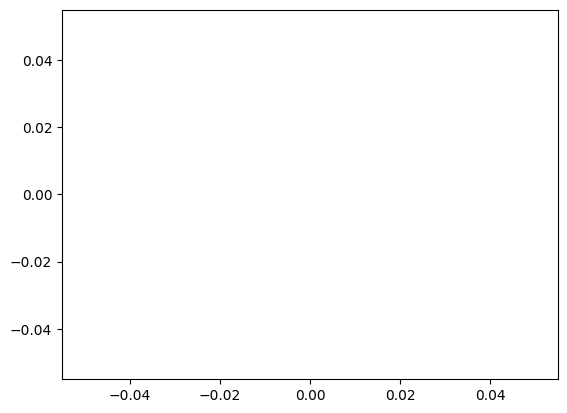

In [115]:
K = 2
alpha = 0.001
epochs = 10000

X_train_matrix = np.zeros((len(X_train), K+1))
for i in range(K+1) :
  X_train_matrix[:,i] = X_train.flatten()**i

y_train = y_train.flatten()

weights_matrix = np.random.uniform(-1,1,K+1)
wm_grad = np.zeros(K+1)

for j in range(epochs) :
  y_pred = np.dot(X_train_matrix, weights_matrix)
  error = y_pred - y_train
  for i in range(K+1) :
    wm_grad[i] = (error * X_train_matrix[:, i]).mean()
  weights_matrix = weights_matrix - alpha * wm_grad

print('\n경사하강법으로 구한 파라미터 :')
for i in range(K+1) :
  print(f'{weights_matrix[i]}')

X_trainp = np.arange(np.min(X_train), np.max(X_train), 0.01).reshape(-1,1)

X_trainp_matrix = np.zeros((len(X_trainp), K+1))

for i in range(K+1) :
  X_trainp_matrix[:, i] = X_trainp.flatten() ** i

y_trainp = np.dot(X_trainp_matrix, weights_matrix)
plt.plot(X_trainp, y_trainp, 'm-')
plt.show()

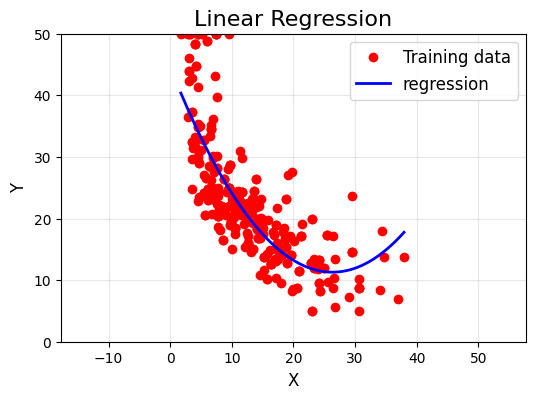

In [62]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

reg = linear_model.LinearRegression()
reg.fit(X_poly, y_train)

xp_poly = poly.transform(xp)

plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.xlim(0,40)
plt.ylim(0,50)
plt.plot(X_train, y_train, 'ro', label = "Training data")

plt.plot(xp, reg.predict(xp_poly), 'b', linewidth = 2, label = "regression")
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim(0,40)
plt.ylim(0,50)
plt.show()

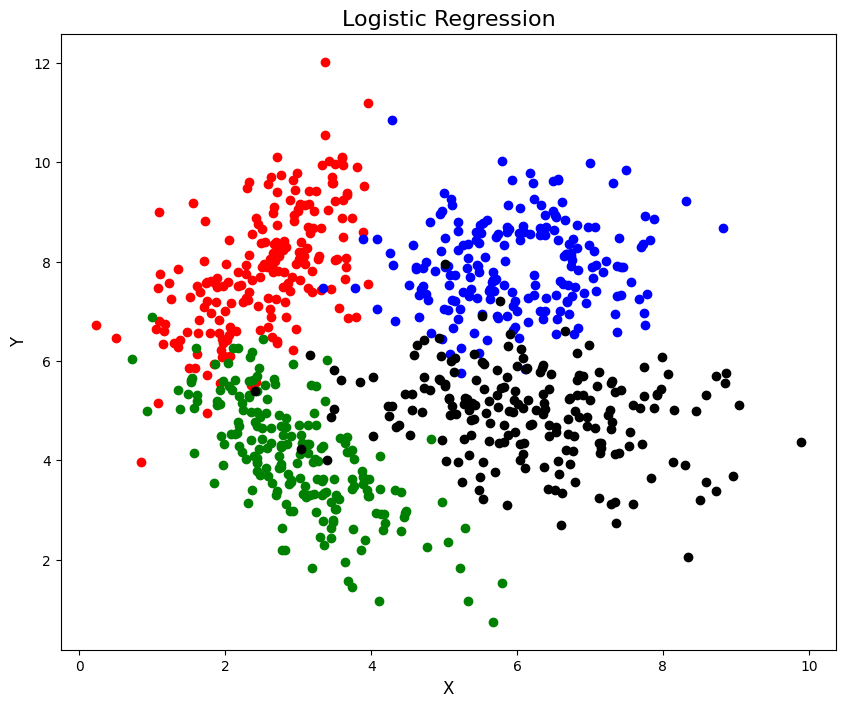

In [72]:
%matplotlib inline
read = pd.read_csv('/content/drive/MyDrive/githar/test/multivariate_data.csv') #(200,8)
C1_X1 = read.iloc[:, 0].values.reshape(-1, 1)
C1_X2 = read.iloc[:, 1].values.reshape(-1, 1)
C2_X1 = read.iloc[:, 2].values.reshape(-1, 1)
C2_X2 = read.iloc[:, 3].values.reshape(-1, 1)
C3_X1 = read.iloc[:, 4].values.reshape(-1, 1)
C3_X2 = read.iloc[:, 5].values.reshape(-1, 1)
C4_X1 = read.iloc[:, 6].values.reshape(-1, 1)
C4_X2 = read.iloc[:, 7].values.reshape(-1, 1)

C1_features = np.hstack((C1_X1, C1_X2))  # C1_X1과 C1_X2 결합
C2_features = np.hstack((C2_X1, C2_X2))  # C2_X1과 C2_X2 결합
C3_features = np.hstack((C3_X1, C3_X2))  # C3_X1과 C3_X2 결합
C4_features = np.hstack((C4_X1, C4_X2))  # C4_X1과 C4_X2 결합

y1_2 = read.iloc[:, 2].values
y2_3 = read.iloc[:, 3].values
y3_4 = read.iloc[:, 4].values
y4_1 = read.iloc[:, 5].values

clf = linear_model.LogisticRegression(solver = 'lbfgs')

clf.fit(C1_features, read.iloc[:, 2])
clf.fit(C2_features, read.iloc[:, 2])
clf.fit(C3_features, read.iloc[:, 2])
clf.fit(C4_features, read.iloc[:, 2])

w = np.zeros([3,1])
w[0,0] = clf.intercept_[0]
w[1,0] = clf.coef_[0,0]
w[2,0] = clf.coef_[0,1]

plt.figure(figsize = (10, 8))
plt.title('Logistic Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(C1_X1, C1_X2, 'ro', label = "Class 1")
plt.plot(C2_X1, C2_X2, 'bo', label = "Class 1")
plt.plot(C3_X1, C3_X2, 'go', label = "Class 1")
plt.plot(C4_X1, C4_X2, 'ko', label = "Class 1")